# UK car dealership Case Study

### Project Brief

You have been hired as a data scientist at a used car dealership in the UK. The sales team have been having problems with pricing used cars that arrive at the dealership and would like your help. Before they take any company wide action they would like you to work with the Toyota specialist to test your idea. They have already collected some data from other retailers on the price that a range of Toyota cars were listed at. It is known that cars that are more than £1500 above the estimated price will not sell. The sales team wants to know whether you can make predictions within this range.

In [ ]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!
# Use this cell to begin, and add as many cells as you need to complete your analysis!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression

## Funciton Definition

Now we will define some functions we are going to use in our case study



In [ ]:
def relaciones_vs_target(X, Y, return_type='axes'):
    '''
    Función que representa gráficos de dispersión de las variables
    en X en función a la variable Y
    '''
    fig_tot = (len(X.columns))
    fig_por_fila = 4.
    tamanio_fig = 4.
    num_filas = int( np.ceil(fig_tot/fig_por_fila) )    
    plt.figure( figsize=( fig_por_fila*tamanio_fig+5, num_filas*tamanio_fig+5 ) )
    c = 0 
    for i, col in enumerate(X.columns):
        plt.subplot(num_filas, fig_por_fila, i+1)
        sns.scatterplot(x=X[col], y=Y)
        plt.title( '%s vs %s' % (col, 'target') )
        plt.ylabel('Target')
        plt.xlabel(col)
    plt.show()
def relaciones_vs_target_reg(X, Y, return_type='axes'):
    '''
    Función que representa gráficos de dispersión de las variables
    en X en función a la variable Y
    '''
    fig_tot = (len(X.columns))
    fig_por_fila = 4.
    tamanio_fig = 4.
    num_filas = int( np.ceil(fig_tot/fig_por_fila) )    
    plt.figure( figsize=( fig_por_fila*tamanio_fig+5, num_filas*tamanio_fig+5 ) )
    c = 0 
    for i, col in enumerate(X.columns):
        plt.subplot(num_filas, fig_por_fila, i+1)
        sns.regplot(x=X[col], y=Y)
        plt.title( '%s vs %s' % (col, 'target') )
        plt.ylabel('Target')
        plt.xlabel(col)
    plt.show()

## Date Reading

First we will read the data provided as a DataFrame and explore the data to see what we have



In [ ]:
df = pd.read_csv("/content/sample_data/toyota.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [ ]:
df.shape

(6738, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


We see there are some variables that are object type so we will have to change that

## Data preprocessing

### Duplicates

We check if there are any duplicates that can be noise in our data and delete them

In [ ]:
df[df.duplicated()].shape

(39, 9)

In [ ]:
df.drop_duplicates(inplace = True, keep = "first")

In [ ]:
print(u'- The number of rows in the dataset is: {}'.format(df.shape[0]))


- The number of rows in the dataset is: 6699


In [ ]:
df = df.reset_index(drop = True)


### Missings

Now we have to check if our information is complete or we have some missings



In [ ]:
df.isnull().sum()


model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

We can se that there is no missing data in our DataFrame



### Data division


To work we need to separate our data into 2, one DataFrame that contains all the independet variables and another one that contains the dependent one



In [ ]:
X = df.drop(['price'],axis=1)
y = df['price']

As we saw previosly there are some object type varibles so we need to change them We are going to use the Get_dummies function to transform the data and be able to use it in our models



In [ ]:
X = pd.get_dummies(data=X, drop_first=True)

In [ ]:
display(X.shape)
display(y.shape)

(6699, 28)

(6699,)

In [ ]:
display(X.head())

,year,mileage,tax,mpg,engineSize,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,...,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2016,24089,265,36.2,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2017,18615,145,36.2,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2015,27469,265,36.2,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2017,14736,150,36.2,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2017,36284,145,36.2,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


### Visualization and Correlation


Now we are going to make some plots to visualize our da



In [ ]:
X_normalizado = (X-X.mean())/X.std()


In [ ]:
X_normalizado.head(2)


,year,mileage,tax,mpg,engineSize,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,...,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,-0.336828,0.062766,2.305166,-1.694639,1.212065,-0.131566,-0.638426,-0.277485,-0.040552,-0.202932,...,-0.024441,-0.131566,-0.021165,-0.679674,0.875234,-0.012218,-0.198506,-0.661662,-0.126179,0.80667
1,0.116631,-0.223692,0.682286,-1.694639,1.212065,-0.131566,-0.638426,-0.277485,-0.040552,-0.202932,...,-0.024441,-0.131566,-0.021165,-0.679674,0.875234,-0.012218,-0.198506,-0.661662,-0.126179,0.80667


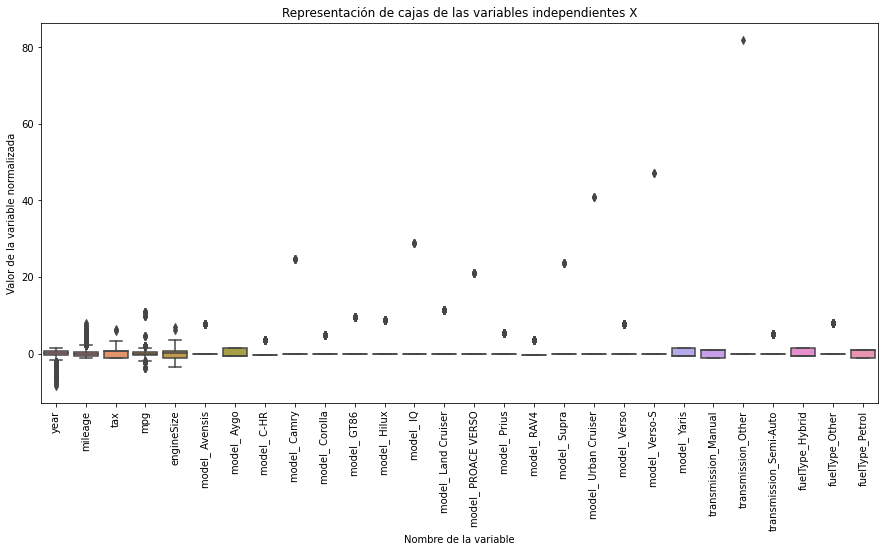

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(data=X_normalizado)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title(u'Representación de cajas de las variables independientes X')
plt.ylabel('Valor de la variable normalizada')
_ = plt.xlabel('Nombre de la variable')

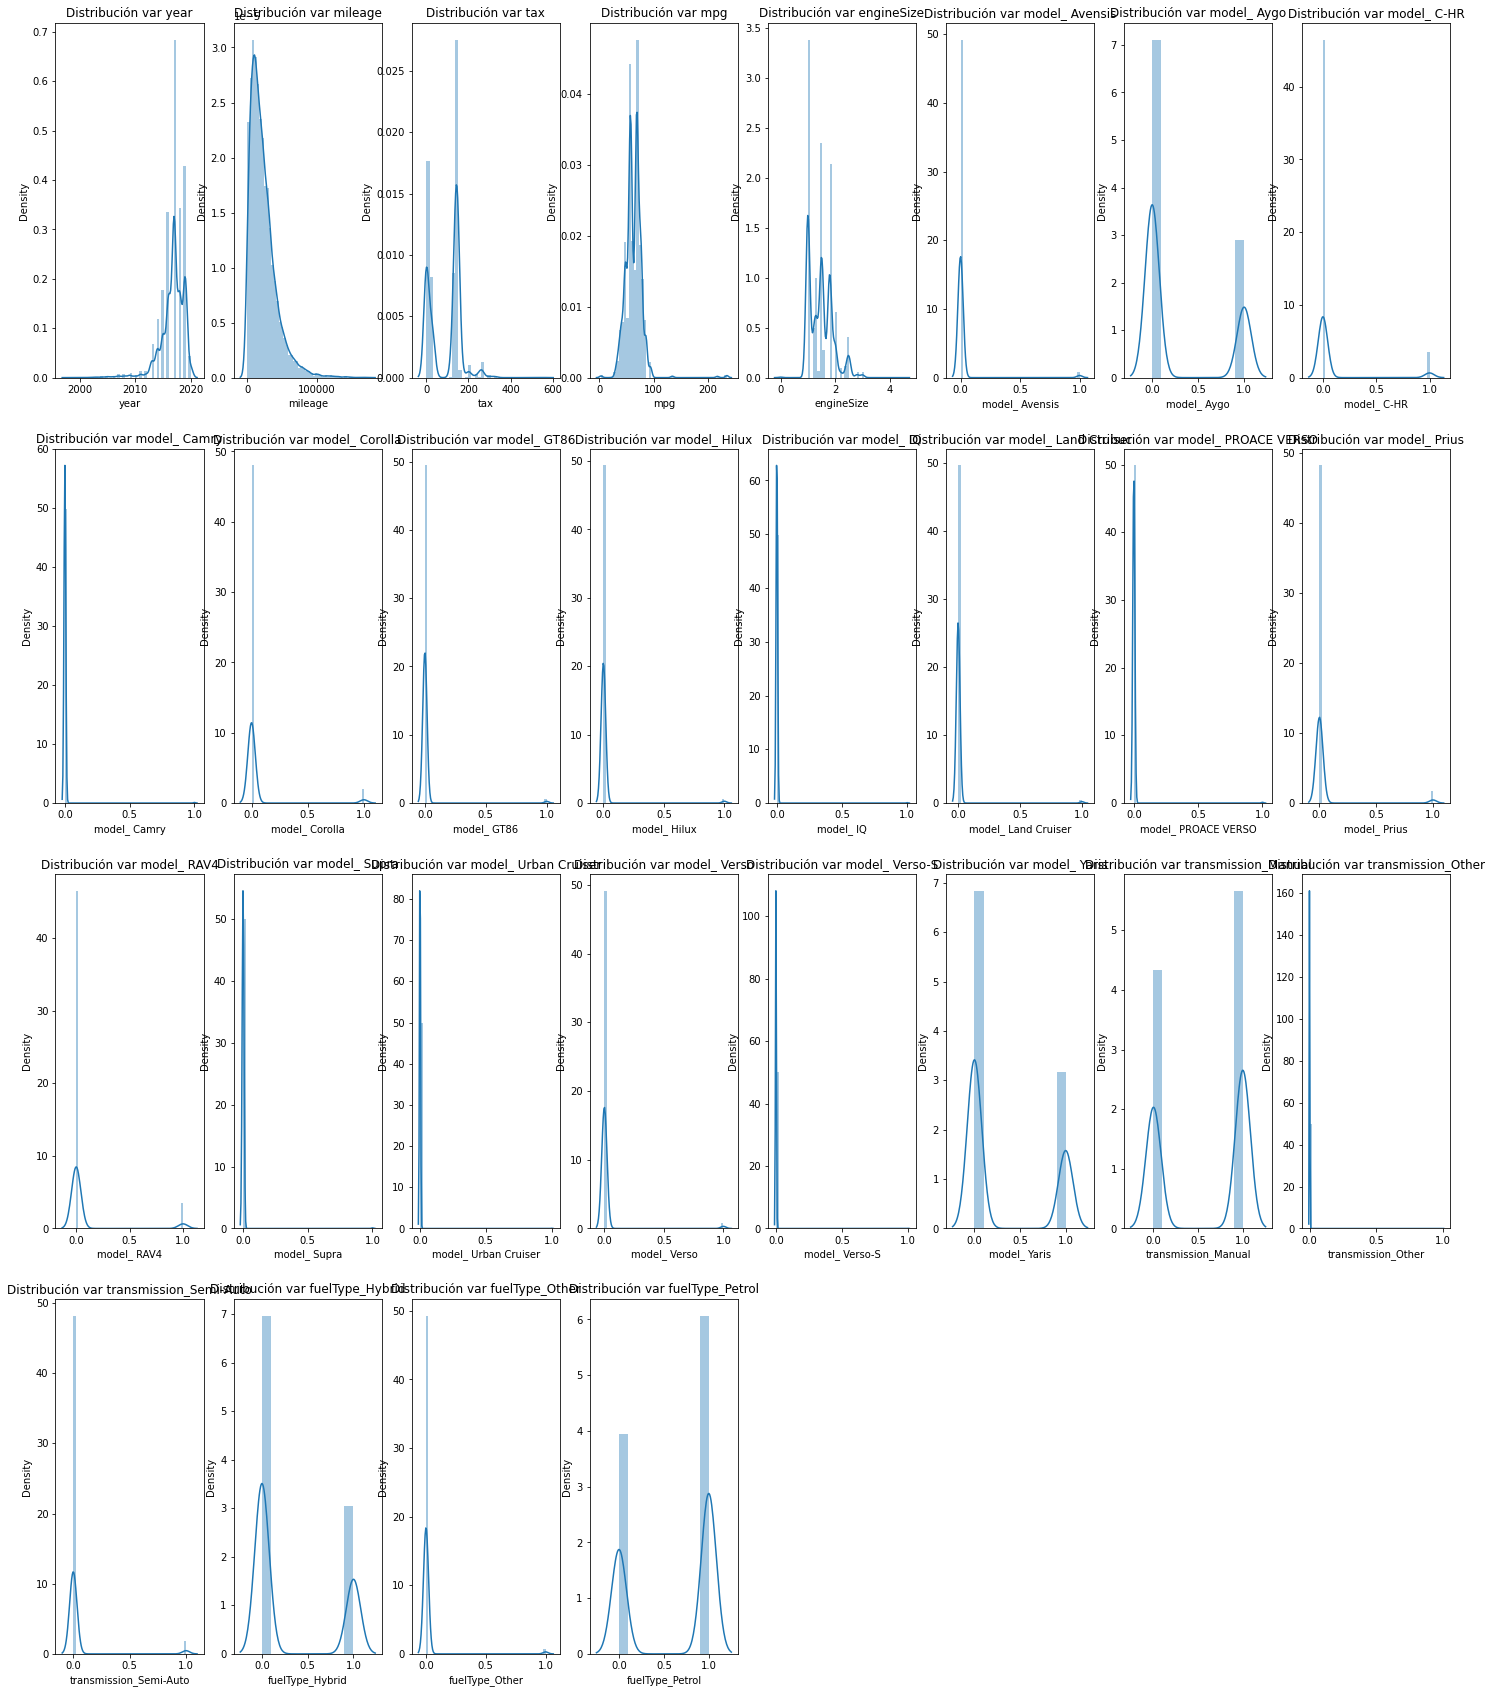

In [ ]:
plt.figure(figsize=(25,30))
n = 0
for i, column in enumerate(X.columns):
    n+=1
    plt.subplot(4, 8, n)
    sns.distplot(X[column])
    plt.title('Distribución var {}'.format(column))
plt.show()

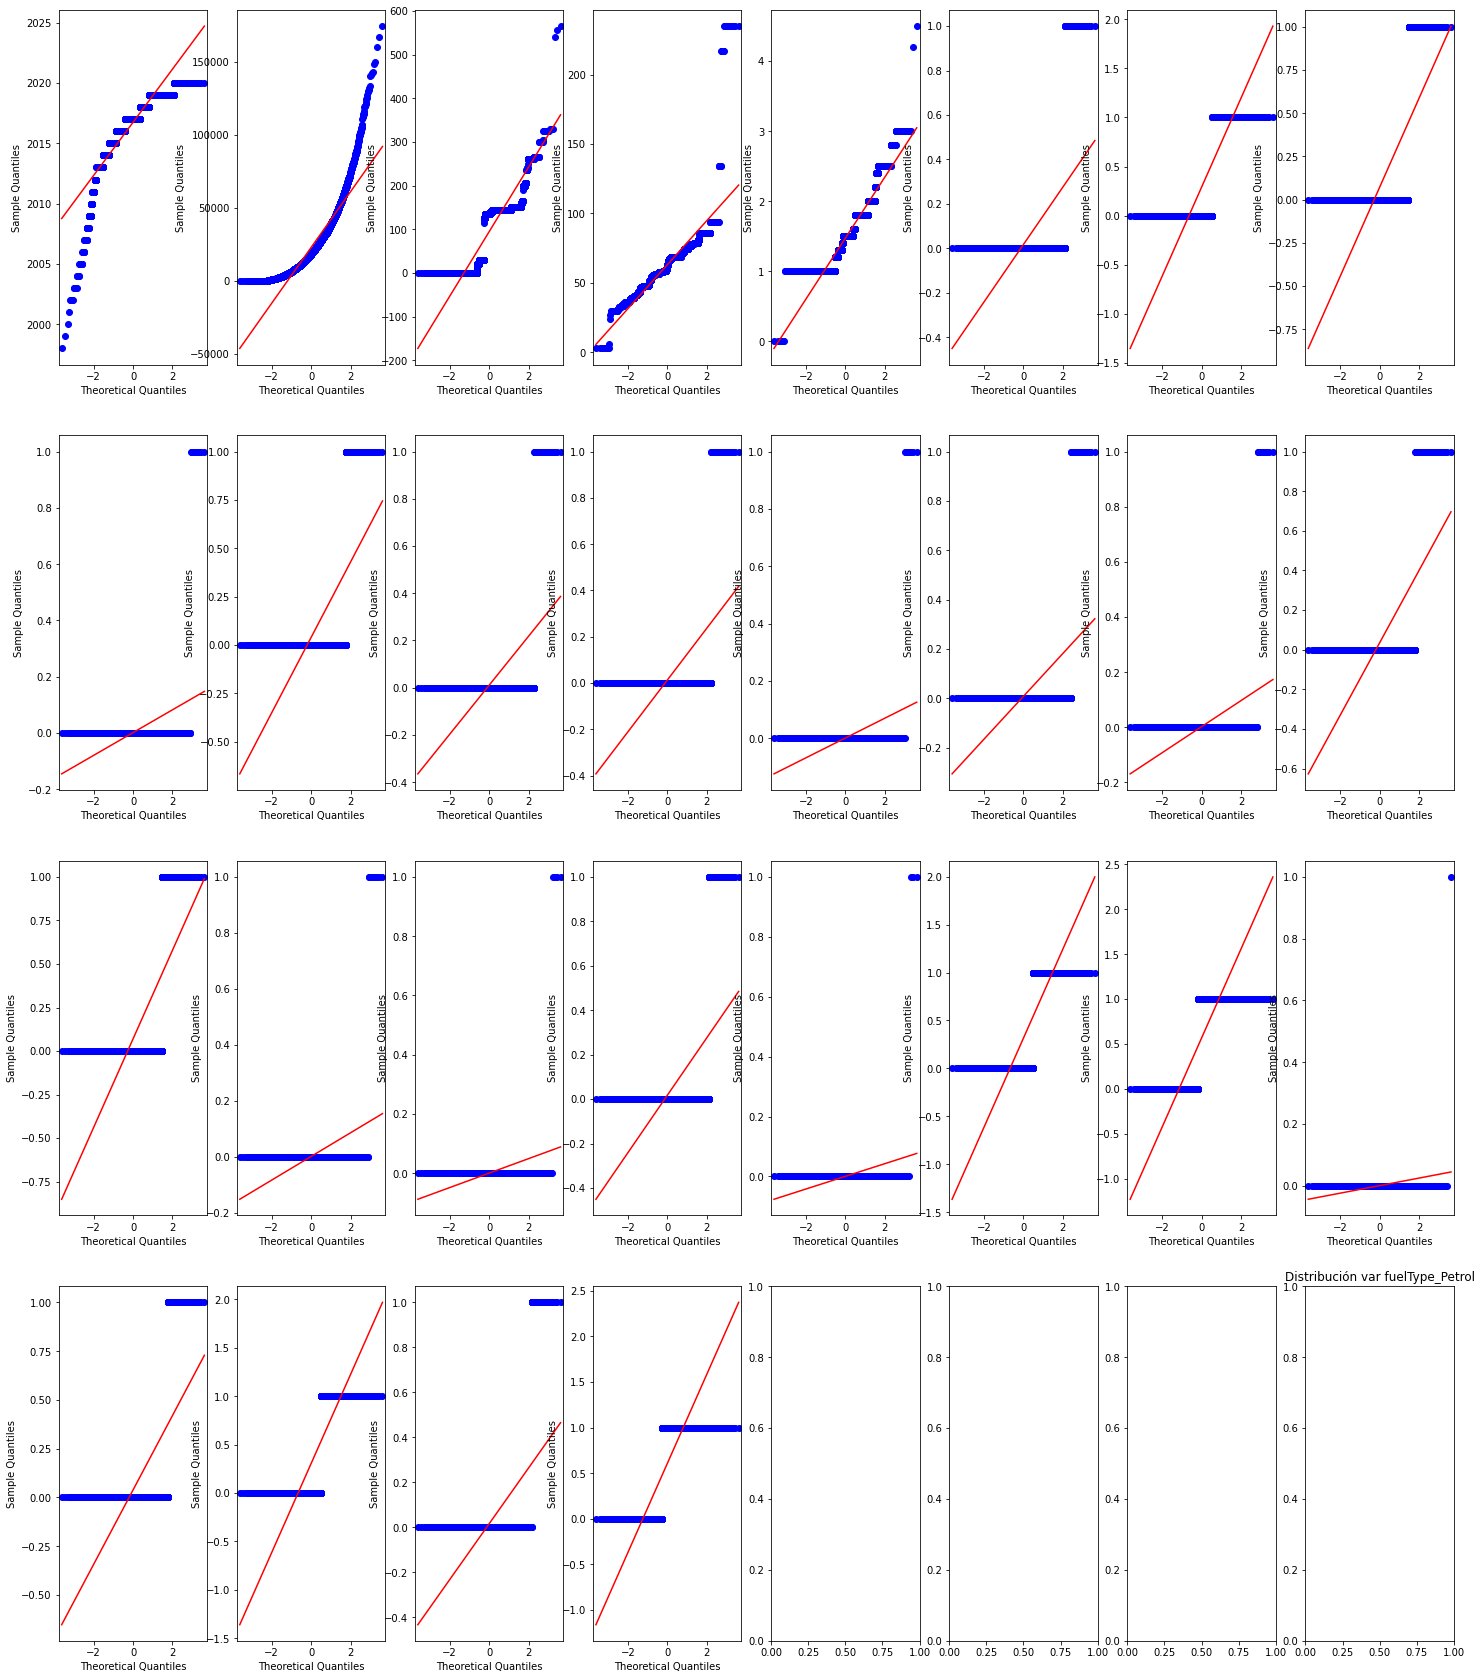

In [ ]:
from statsmodels.graphics.gofplots import qqplot
fig, axes = plt.subplots(nrows=4, ncols=8,figsize=(25,30) )
ax= axes.flatten()
for i, column in enumerate(X_normalizado.columns):
    qqplot(X[column] , line='s', ax=ax[i])
    plt.title('Distribución var {}'.format(column))
plt.show()

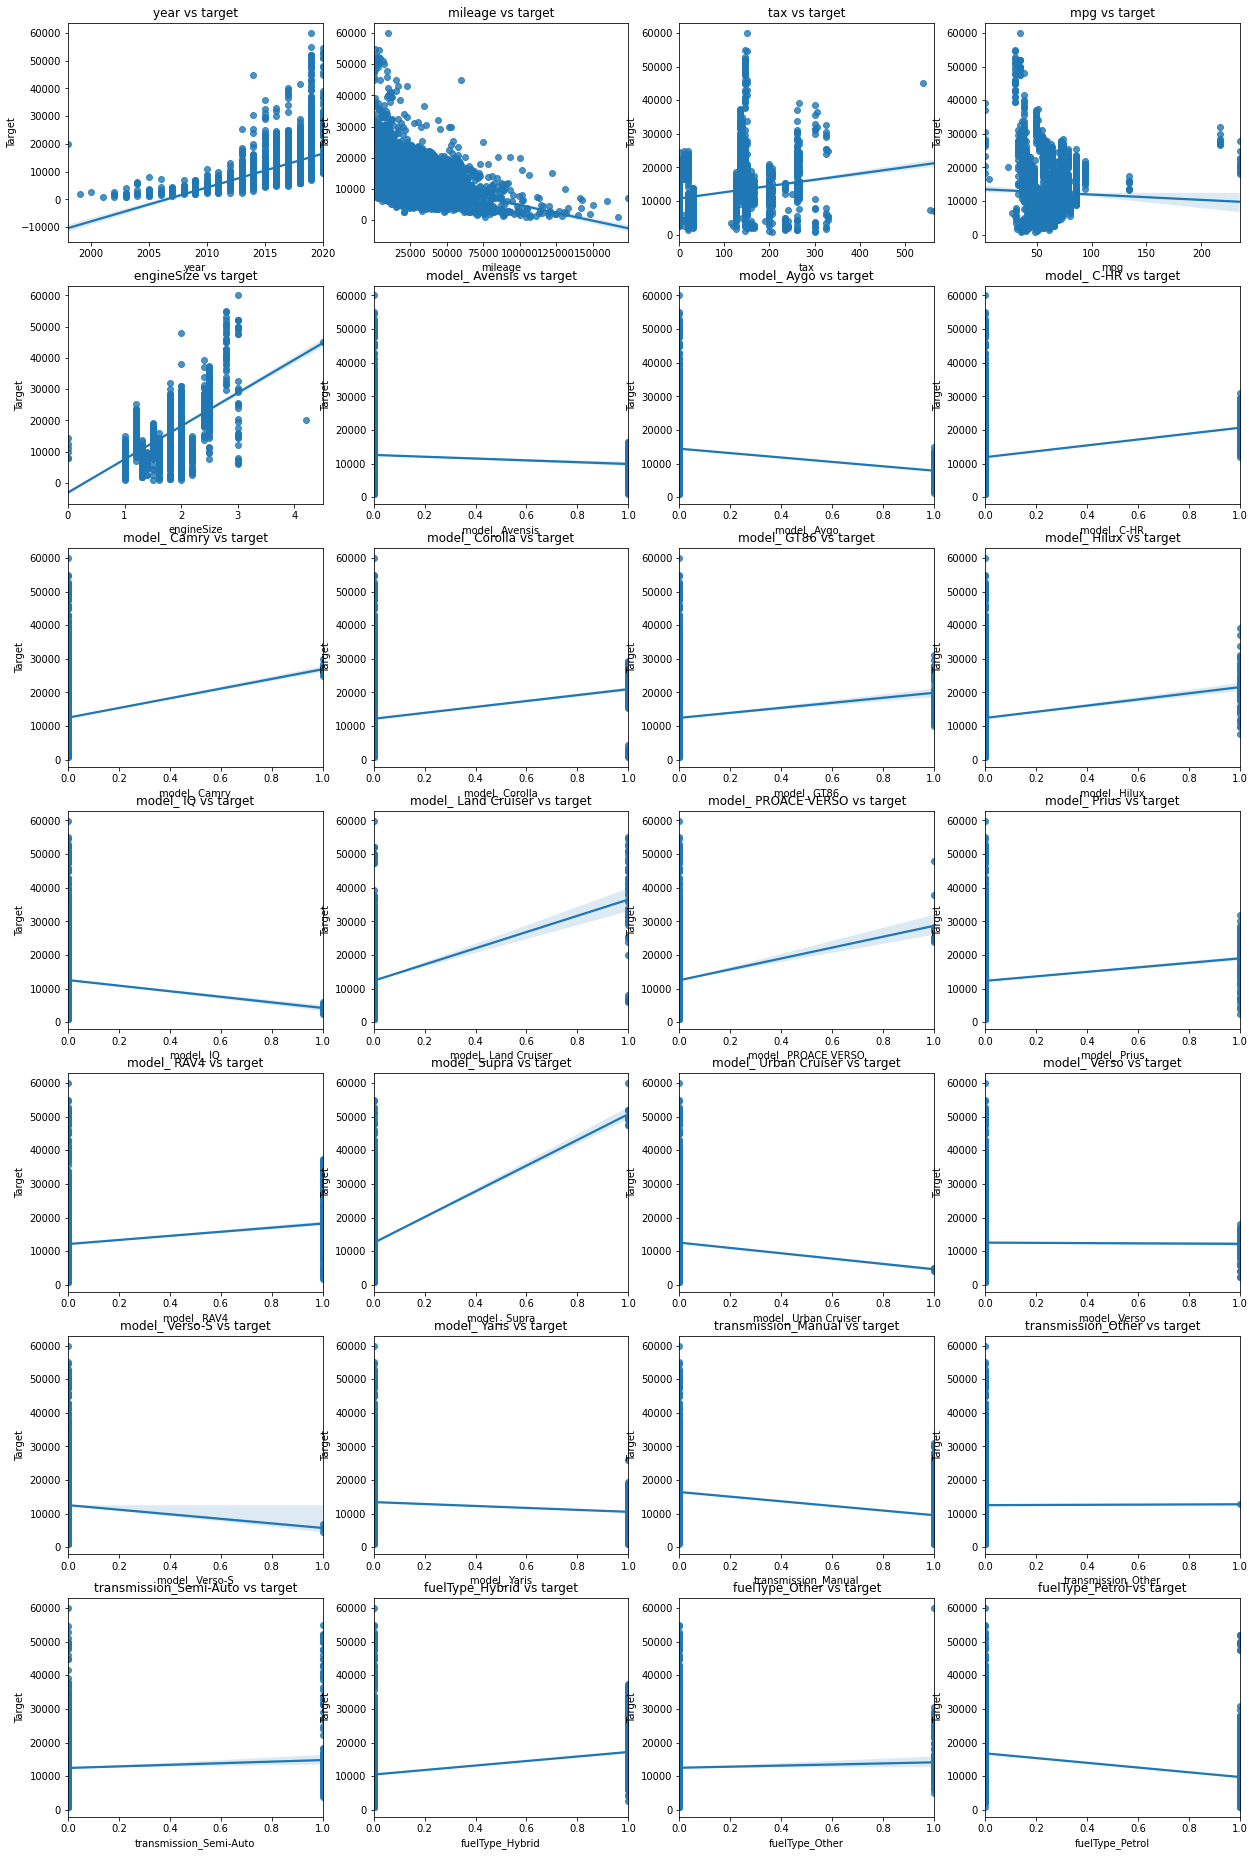

In [ ]:
relaciones_vs_target_reg(X, y)


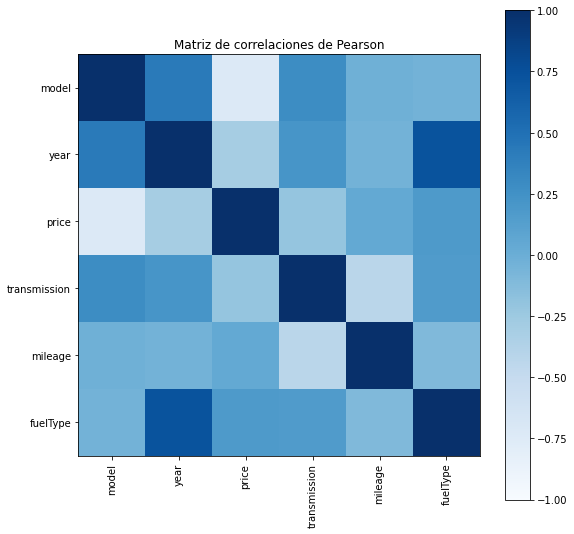

In [ ]:
matriz_correlaciones = df.corr(method='pearson')
n_ticks = len(df.columns)
plt.figure( figsize=(9, 9) )
plt.xticks(range(n_ticks), df.columns, rotation='vertical')
plt.yticks(range(n_ticks), df.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Blues')))
_ = plt.title('Matriz de correlaciones de Pearson')

In [ ]:
correlaciones_target = matriz_correlaciones.values[ -1, : -1]
indices_inversos =  abs(correlaciones_target[ : ]).argsort()[ : : -1]
diccionario = {}
for nombre, correlacion in zip( X.columns[indices_inversos], list(correlaciones_target[indices_inversos] ) ):
    diccionario[nombre] = correlacion
pd.DataFrame.from_dict(diccionario, orient='index', columns=['Correlación con la target'])

,Correlación con la target
mileage,0.728791
tax,0.176981
mpg,0.157548
engineSize,-0.107048
year,-0.041643


In [ ]:
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_estandarizado, y, test_size=0.2, random_state=0)

### Ridge

In [ ]:
modelo = Ridge()
parametros = {"alpha": list(range(1,20, 1))}

In [ ]:
modelo_gs = GridSearchCV(modelo, param_grid=parametros,
                         cv = 5, scoring='neg_mean_squared_error')
modelo_gs.fit(X_train, Y_train)

In [ ]:
print(modelo_gs.best_params_)

In [ ]:
reg_lineal =  Ridge(alpha=modelo_gs.best_params_['alpha'])

In [ ]:
reg_lineal.fit(X_train, Y_train)
print("Intercept of the regresión lineal b: %f" % reg_lineal.intercept_)

In [ ]:
Y_train_pred = reg_lineal.predict(X_train)
plt.title('Real values vs predictions in train')
plt.xlabel('Real values')
plt.ylabel('Predictions')
_ = plt.plot(Y_train, Y_train_pred, '.', Y_train, Y_train, '-')

In [ ]:
Y_test_pred = reg_lineal.predict(X_test)
plt.title('Real values vs predictions in train')
plt.xlabel('Real values')
plt.ylabel('Predictions')
_ = plt.plot(Y_test, Y_test_pred, '.', Y_test, Y_test, '-')

In [ ]:
difference = Y_test_pred - Y_test

In [ ]:
interested = (difference <= 1500 )

In [ ]:
df_interested = pd.DataFrame(interested)

In [ ]:
df_interested.price.value_counts()

In [ ]:
df_interested.price.value_counts(normalize=True)

We can see that our model gives a fair price to most of them (89%)



In [ ]:
mse_rl = MSE ( Y_test,Y_test_pred)
rmse_rl = mse_rl**(1/2)
print(rmse_rl)

### Decision Tree

In [ ]:
dt = DecisionTreeRegressor()
parametros = {"max_depth":range(1,20),"criterion" : ["mse","mae"],'min_samples_leaf':[20,40,100]}

In [ ]:
modelo_gs_dt = GridSearchCV(dt, param_grid=parametros,
                         cv = 5)
modelo_gs_dt.fit(X_train, Y_train)

In [ ]:
print(modelo_gs_dt.best_params_)

In [ ]:
dt = DecisionTreeRegressor(max_depth = 13, min_samples_leaf = 20, random_state = 0,criterion = 'mse' )

In [ ]:
dt.fit(X_train,Y_train)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
Y_train_pred = dt.predict(X_train)
plt.title('Valores reales vs predicciones en train')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
_ = plt.plot(Y_train, Y_train_pred, '.', Y_train, Y_train, '-')

In [ ]:
plt.title('Valores reales vs predicciones en test')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
_ = plt.plot(Y_test, y_pred, '.', Y_test, Y_test, '-')

In [ ]:
difference = y_pred - Y_test

In [ ]:
interested = (difference <= 1500 )

In [ ]:
df_interested = pd.DataFrame(interested)

In [ ]:
df_interested.price.value_counts()


In [ ]:
df_interested.price.value_counts(normalize=True)


We can see that our model gives a fair price to most of them (92%)



In [ ]:
mse_dt = MSE ( Y_test,y_pred)
rmse_dt = mse_dt**(1/2)
print(rmse_dt)

### Random Forest

In [ ]:
modelo_rf = RandomForestRegressor()
parametros = {"n_estimators": [50,100,200,400], "max_depth":range(1,20)}

In [ ]:
modelo_gs_rf = GridSearchCV(modelo_rf, param_grid=parametros,
                         cv = 5)
modelo_gs_rf.fit(X_train, Y_train)

In [ ]:
print(modelo_gs_rf.best_params_)

In [ ]:
random_forest =  RandomForestRegressor(max_depth=modelo_gs_rf.best_params_['max_depth'],
                                      n_estimators=modelo_gs_rf.best_params_['n_estimators'])

In [ ]:
random_forest.fit(X_train, Y_train)

In [ ]:
Y_train_pred = random_forest.predict(X_train)
plt.title('Valores reales vs predicciones en train')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
_ = plt.plot(Y_train, Y_train_pred, '.', Y_train, Y_train, '-')

In [ ]:
Y_test_pred = random_forest.predict(X_test)
plt.title('Valores reales vs predicciones en test')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
_ = plt.plot(Y_test, Y_test_pred, '.', Y_test, Y_test, '-')

In [ ]:
importances_rf = pd.Series(random_forest.feature_importances_,index = X.columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh',color='blue')
plt.show()

In [ ]:
difference = Y_test_pred - Y_test

In [ ]:
interested = (difference <= 1500 )

In [ ]:
df_interested = pd.DataFrame(interested)

In [ ]:
df_interested.price.value_counts()

In [ ]:
df_interested.price.value_counts(normalize=True)

We can see that our model gives a fair price to most of them (94%)

In [ ]:
mse_rf = MSE ( Y_test,Y_test_pred)
rmse_rf = mse_rf**(1/2)
print(rmse_rf)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = MSE(Y_test,y_pred_lr)
rmse_lr = mse_lr **(1/2)

In [ ]:
# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

# Print rmse_rf
print('Random Forest test set RMSE: {:.2f}'.format(rmse_rf))
# Print rmse_rl
print('Regression Linear test set RMSE: {:.2f}'.format(rmse_rl))

As we can see the best model is the random forest an it gives us almost 94% of prices in our requested range